In [17]:
from unet import UNet
import matplotlib.pyplot as plt
from diffusion import Diffusion
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
from PIL import Image
import torch.nn as nn
import torch

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [3]:
from torch.utils.data import DataLoader

In [4]:
train_dataset = datasets.CIFAR10(root = 'data/', train = True, download = True, transform = transform)
test_dataset = datasets.CIFAR10(root = 'data/', train = False, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 16, shuffle = False)

In [6]:
def save_images(images, path, **kwargs):
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    im.save(path)

In [7]:
import torch.optim as optim

In [43]:
def train(
    device = 'cpu',
    lr = 1e-4,
    img_size = 32,
    epochs = 10,
    
):
    
    model = UNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    diffusion = Diffusion(img_size=img_size, device=device)
    for epoch in range(epochs):
        with tqdm(train_loader, unit="batch") as tepoch:
            for images, label in tepoch:
                tepoch.set_description(f"Epoch {epoch+1}")
                images = images.to(device)
                t = diffusion.sample_timesteps(images.shape[0]).to(device)
                x_t, noise = diffusion.sample_noise_image(images, t)
                predicted_noise = model(x_t, t)
                loss = criterion(noise, predicted_noise)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                tepoch.set_postfix(loss=loss.item())
        
        sampled_images = diffusion.sample_initial_image(model, images.shape[0])
        save_images(sampled_images, path = './runs/epoch{}_sampled_images.jpg'.format(epoch+1))   

In [9]:
model = UNet().to('cpu')
#optimizer = optim.Adam(model.parameters(), lr=lr)
#criterion = nn.MSELoss()
diffusion = Diffusion(img_size=32, device='cpu')

In [10]:
criterion = nn.MSELoss()

In [11]:
device = 'cpu'

In [12]:
images, label = next(iter(train_loader))

In [13]:
images = images.to(device)
t = diffusion.sample_timesteps(images.shape[0]).to(device)
x_t, noise = diffusion.sample_noise_image(images, t)
predicted_noise = model(x_t, t)
loss = criterion(noise, predicted_noise)

In [19]:
sqrt_alpha_bar = torch.sqrt(diffusion.alpha_bar[t])[:, None, None, None]
sqrt_one_minus_alpha_bar = torch.sqrt(1 - diffusion.alpha_bar[t])[:, None, None, None]

In [21]:
print(sqrt_one_minus_alpha_bar)

tensor([[[[0.9442]]],


        [[[0.9998]]],


        [[[0.9886]]],


        [[[0.2437]]],


        [[[0.9865]]],


        [[[0.9998]]],


        [[[0.8255]]],


        [[[0.9627]]],


        [[[0.8467]]],


        [[[0.7180]]],


        [[[0.9730]]],


        [[[0.8980]]],


        [[[0.1203]]],


        [[[0.7392]]],


        [[[0.9999]]],


        [[[0.9851]]]])


In [22]:
sqrt_alpha_bar

tensor([[[[0.3294]]],


        [[[0.0206]]],


        [[[0.1504]]],


        [[[0.9698]]],


        [[[0.1638]]],


        [[[0.0215]]],


        [[[0.5645]]],


        [[[0.2705]]],


        [[[0.5321]]],


        [[[0.6961]]],


        [[[0.2310]]],


        [[[0.4400]]],


        [[[0.9927]]],


        [[[0.6735]]],


        [[[0.0111]]],


        [[[0.1719]]]])

In [21]:
t

tensor([146, 114, 837, 488, 890, 723, 391, 351, 440, 309, 301, 276, 571, 379,
        771, 488])

In [20]:
import matplotlib.pyplot as plt

In [22]:
images

tensor([[[[0.6314, 0.6157, 0.6157,  ..., 0.6000, 0.5843, 0.5647],
          [0.6275, 0.6118, 0.6118,  ..., 0.6157, 0.6000, 0.5804],
          [0.6235, 0.6078, 0.6118,  ..., 0.6392, 0.6314, 0.6235],
          ...,
          [0.3294, 0.3020, 0.2863,  ..., 0.3216, 0.3020, 0.2863],
          [0.3176, 0.2980, 0.2745,  ..., 0.2667, 0.2588, 0.2471],
          [0.2980, 0.2863, 0.2627,  ..., 0.2431, 0.2314, 0.2235]],

         [[0.6588, 0.6588, 0.6627,  ..., 0.6118, 0.5961, 0.5843],
          [0.6706, 0.6706, 0.6745,  ..., 0.6471, 0.6275, 0.6118],
          [0.6784, 0.6824, 0.6863,  ..., 0.6549, 0.6471, 0.6392],
          ...,
          [0.5569, 0.5490, 0.5333,  ..., 0.5647, 0.5529, 0.5451],
          [0.5569, 0.5490, 0.5333,  ..., 0.5412, 0.5373, 0.5373],
          [0.5451, 0.5412, 0.5373,  ..., 0.5412, 0.5373, 0.5373]],

         [[0.7059, 0.7059, 0.7020,  ..., 0.6235, 0.6039, 0.5843],
          [0.7529, 0.7529, 0.7451,  ..., 0.6980, 0.6706, 0.6510],
          [0.7412, 0.7451, 0.7373,  ..., 0

In [25]:
images.shape

torch.Size([16, 3, 32, 32])

In [23]:
x_t[2]

tensor([[[-0.1181, -0.4795, -0.9563,  ...,  1.4093, -1.5725,  2.0850],
         [ 0.8942, -0.0639,  2.5998,  ..., -0.1994,  0.2874, -1.6820],
         [ 1.4410, -0.8446, -0.3476,  ..., -1.1601,  0.1105,  1.7786],
         ...,
         [-2.2272, -0.8667,  0.6140,  ...,  0.4518,  1.5797,  0.1261],
         [ 1.8191,  0.1365,  0.7763,  ..., -0.4708, -0.3174,  0.7889],
         [ 0.0300, -0.5844, -0.3902,  ...,  1.0298,  0.2156, -0.4290]],

        [[ 0.4244,  0.7518, -0.2942,  ..., -1.2044,  0.8891,  0.6702],
         [-0.9994, -2.2496,  1.0503,  ...,  0.4698, -1.0159, -1.7676],
         [-0.2005, -0.9599,  1.4399,  ...,  1.1895,  0.5636, -0.2893],
         ...,
         [ 1.7582,  0.9004, -1.1410,  ..., -1.5394, -0.7286, -0.7447],
         [ 1.8989,  0.2132, -1.2373,  ...,  1.8867, -0.3820,  0.8798],
         [ 1.0902,  0.5541,  0.7648,  ...,  0.3199,  0.1856,  1.4410]],

        [[-0.3340,  1.6900, -1.5028,  ..., -0.0727, -0.3431, -1.6258],
         [ 1.0005,  0.7284,  0.2152,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


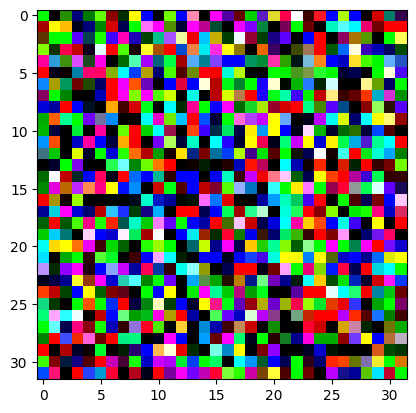

In [40]:
plt.imshow(x_t[15].permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


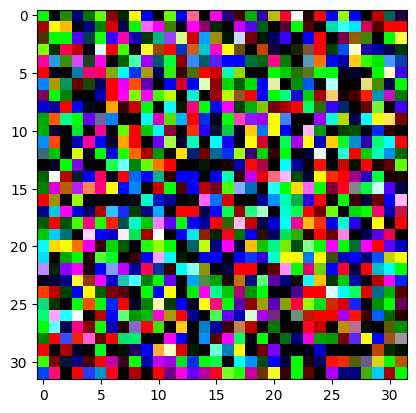

In [41]:
plt.imshow(noise[15].permute(1,2,0))

In [18]:
noise

tensor([[[[ 7.6392e-03,  1.1879e+00, -2.4429e-01,  ...,  4.8421e-01,
           -5.9493e-01, -9.5897e-01],
          [-3.9247e-01,  1.5234e-01,  1.8501e-01,  ..., -4.4563e-01,
           -5.8966e-01, -1.3296e+00],
          [ 7.5066e-02,  8.8346e-01, -9.7526e-01,  ..., -3.5088e-01,
           -1.0415e+00,  9.4792e-01],
          ...,
          [-1.2266e-01, -2.1626e+00, -6.0329e-01,  ...,  1.1736e+00,
            1.1487e+00,  5.4720e-01],
          [ 6.5962e-01, -9.8504e-01, -6.0638e-01,  ...,  7.0926e-01,
            1.8010e+00,  8.1099e-01],
          [-8.1935e-01, -8.8966e-01, -1.1876e+00,  ..., -1.6232e+00,
           -1.4483e+00, -9.0634e-01]],

         [[ 8.6452e-01, -7.5811e-01, -6.3345e-01,  ...,  3.2975e-01,
           -2.9797e-02,  3.2674e-01],
          [ 7.1972e-01, -5.1593e-01,  5.4007e-01,  ..., -9.2504e-01,
           -1.0325e+00,  9.8646e-01],
          [-9.4266e-01,  4.7034e-01,  4.9193e-01,  ...,  6.3506e-01,
            7.9987e-02,  3.6328e-01],
          ...,
     

In [14]:
loss

tensor(1.3242, grad_fn=<MseLossBackward0>)

In [ ]:
diffusion.sample_noise_image()

In [ ]:
train()

Epoch 1:   6%|▊             | 187/3125 [05:03<1:30:06,  1.84s/batch, loss=0.087]